# 0. Dependências

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

%matplotlib inline

/Users/arnaldo/miniconda3/envs/ml/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


# 1. Introdução

**Vantagens:**
- Fácil de implementar
- Rápido e eficiente

**Desvantagens:**
- É necessário definir a quantidade de clusters;
- A posição inicial dos clusters tem uma forte influência no resultado final;
- Sensível a outliers;

# 2. Dados

Para esse algoritmo, nós vamos utilizar a função [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) do *scikit-learn* para gerar clusters aleatórios e utilizá-los para testar a nossa implementação do K-Means.

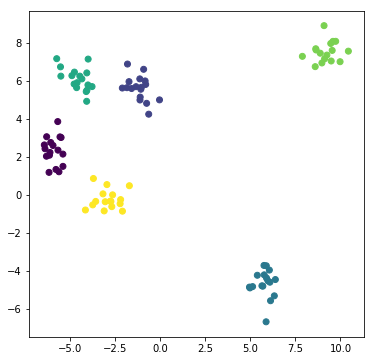

In [2]:
x, y = make_blobs(n_samples=100, centers=6, random_state=1234, cluster_std=0.6)

plt.figure(figsize=(6, 6))
plt.scatter(x[:, 0], x[:, 1], c=y)

# 3. Implementação 

In [3]:
class K_Means():
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    
    def fit(self, x):
        col_min, col_max = x.min(axis=0), x.max(axis=0)
        self.centroids = np.array([np.random.rand(x.shape[1])*col_max + col_min for i in range(self.n_clusters)])
            
        for i in range(self.max_iter):
            clusters_idxs = self.predict(x)
            for c in range(self.n_clusters):
                if c in clusters_idxs:
                    self.centroids[c] = np.mean(x[c == clusters_idxs], axis=0)
                    
    def predict(self, x):
        distances = cdist(x, self.centroids)
        return np.argmin(distances, axis=1)        

# 4. Teste 

In [4]:
def plotKMeans(x, y, centroids, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(x[:,0], x[:,1],c=y)
    plt.scatter(centroids[:,0], centroids[:,1], s=100, c='red')
    plt.title(title)

[[-5.89115978  2.33887408]
 [-1.15698106  5.63230377]
 [ 5.76444812 -4.67941789]
 [-4.53406813  6.11523454]
 [ 9.20551979  7.56124841]
 [-2.89174024 -0.22808556]]


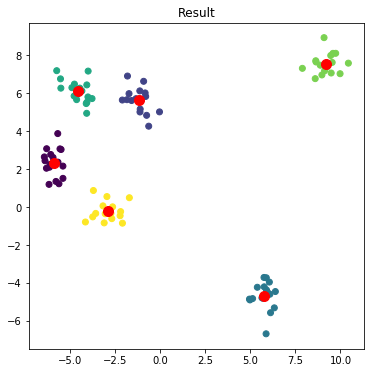

In [5]:
np.random.seed(1234)
kmeans = K_Means(n_clusters=6, max_iter=300)
kmeans.fit(x)

print(kmeans.centroids)

plotKMeans(x, y, kmeans.centroids, 'Result')

### Comparação com o Scikit-learn

[[ 9.20551979  7.56124841]
 [-2.89174024 -0.22808556]
 [ 5.76444812 -4.67941789]
 [-4.53406813  6.11523454]
 [-1.15698106  5.63230377]
 [-5.89115978  2.33887408]]


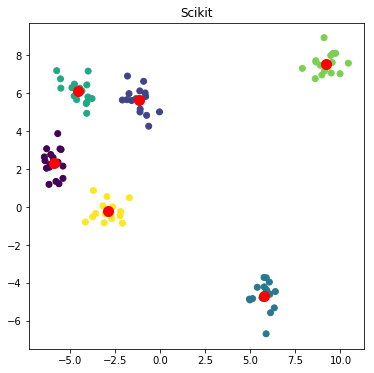

In [6]:
kmeans = KMeans(n_clusters=6, max_iter=300, random_state=1234)
kmeans.fit(x)
pred = kmeans.predict(x)

print(kmeans.cluster_centers_)

plt.figure(figsize=(7, 6))
plotKMeans(x, y, kmeans.cluster_centers_, 'Scikit')